<a href="https://colab.research.google.com/github/alazowski/Customer-Personality-Analysis-Project/blob/main/Customer_Personality_Analysis_(820).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline
PALETTE = sns.color_palette("Set2")

from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
from pandas.core.frame import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Data Cleaning

## 1. Basic information of the dataset

In [ ]:
df.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013
Recency,58,38,26
MntWines,635,11,426


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.shape

(2240, 29)

## 2. Missing values

* There are 24 null values in Income column. we replaced these values with median

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'].fillna(df['Income'].median(), inplace=True)

## 3. Delete irrelevant columns

* Column Z_revenue and Z_costcontact have 0 variance, so we decided to remove it

In [ ]:
df =df.drop(df[['Z_Revenue','Z_CostContact']], axis=1)

## 4. Add 'Age' Column
* We created age column using 'Year_Birth' column

In [ ]:
df.insert(1, 'Age', 2021 - df['Year_Birth'])

In [ ]:
#drop age column
df =df.drop(df[['Year_Birth']], axis=1)

## 5. Remove extreme outliers

* In the Age column, We have 3 customers whose age is older than 120.
* In the Income column, We have 1 record that is higher than 600,000.
* We decided to remove these outliers for a more balanced distribution

In [ ]:
df.query('Age > 120')

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,121,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,128,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,122,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,6,4,1,0,0,1,0,0,0,0


In [ ]:
df.query('Income < 600000')

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,64,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,67,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,56,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,37,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,40,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,75,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,40,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,65,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
df = df.loc[(df["Age"] < 120) & (df["Income"] < 600000)]

In [ ]:
df.shape

(2236, 27)

# Feature Engineering

### Merge some values in 'Marital_Status' and 'Education' columns

* For marital status column, we combined ‘YOLO’,  ‘absurd’, and ‘alone’ into one term ‘single’
* For education column, the 2nd cycle is the same as an Undergrauate degree so we combined basic and 2nd cycle together.

In [ ]:
df['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)

In [ ]:
df["Education"] = df["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate'})

## Total number of accepted promotion, Number of children, Total Number of Purchases and Total Expenditure

In [ ]:
#Total number of accepted promotion
df['AcceptedTotal'] = df.filter(regex='Accepted|Response').sum(axis=1)

#Number of childeren
df['NumChildren'] = df['Kidhome'] + df['Teenhome']
df['HasChildren'] = (df['NumChildren'] >= 1).astype('int64')

In [ ]:
#drop age column
df =df.drop(df[['Kidhome', 'Teenhome']], axis=1)

In [ ]:
# Total Number of Purchases
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
# Total Expenditure
df['spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
#check to see acceptedtotal unique values
df['AcceptedTotal'].unique()

array([1, 0, 3, 2, 4, 5])

## 7. Final shape of the dataset
* 30 columns
* 2236 rows

In [ ]:
df.shape

(2236, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Age                  2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Dt_Customer          2236 non-null   object 
 6   Recency              2236 non-null   int64  
 7   MntWines             2236 non-null   int64  
 8   MntFruits            2236 non-null   int64  
 9   MntMeatProducts      2236 non-null   int64  
 10  MntFishProducts      2236 non-null   int64  
 11  MntSweetProducts     2236 non-null   int64  
 12  MntGoldProds         2236 non-null   int64  
 13  NumDealsPurchases    2236 non-null   int64  
 14  NumWebPurchases      2236 non-null   int64  
 15  NumCatalogPurchases  2236 non-null   i

# Exploratory Data Analysis

## 1. Correlation heatmap
* 'Income': Based on the heatmap, we can say that there is a positive correlation between Income and features related to Product and Purchases.
* 'Kidhome': There is a negative relationship between Kidhome and features related to Product and Purchases.
* 'Products', 'Number of purchases': In the middle of heatmap, we can see the correlation between products and number of purchases.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


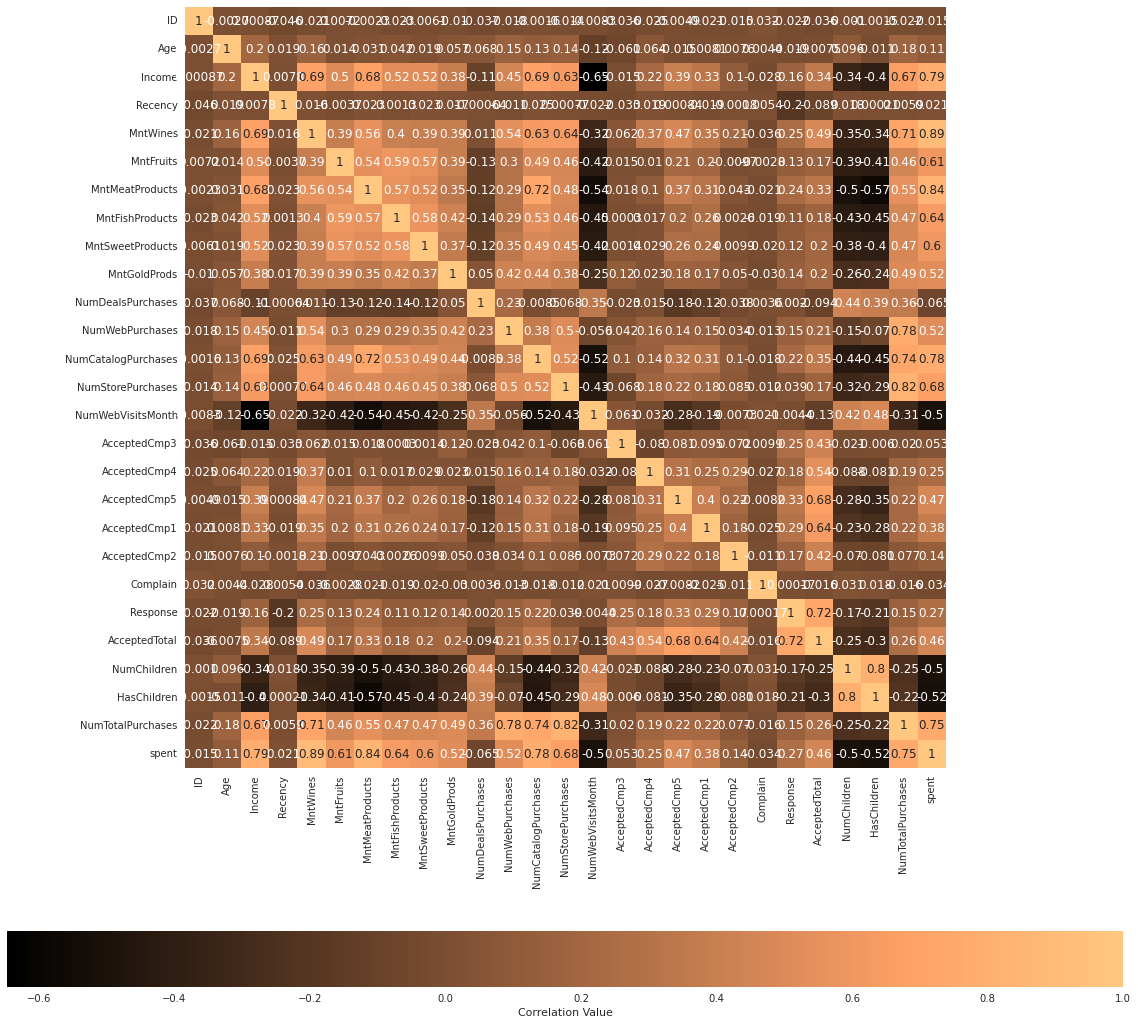

In [ ]:
corrmat = df.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat,cmap = "copper",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});
plt.show()

## 2. Education

### Education Proportion

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


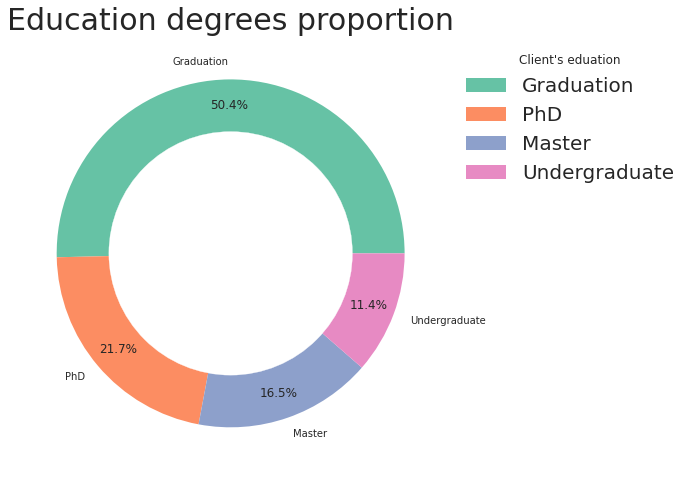

In [ ]:
sizes = dict(df['Education'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion", fontsize=30)
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)
plt.legend(title="Client's eduation", labels=sizes.keys(), bbox_to_anchor=(1, 1), fontsize=20)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Relationship between education and kids at home

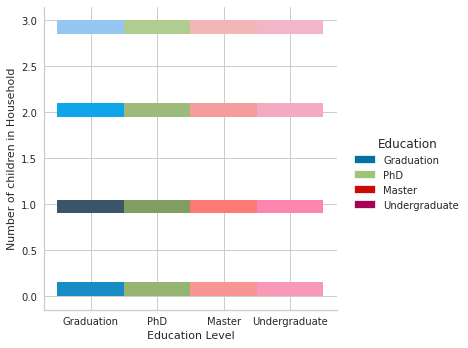

In [ ]:
sns.displot(data= df, y= "NumChildren", x= "Education", hue= "Education")
plt.ylabel('Number of children in Household')
plt.xlabel('Education Level')
plt.show()

### Relationship between education and Income

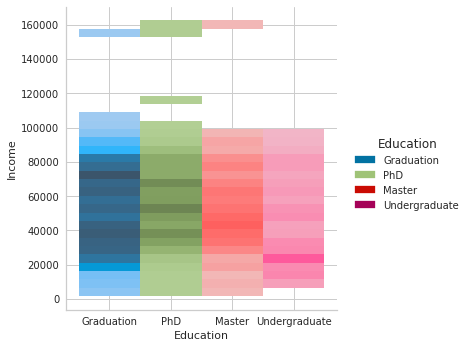

In [ ]:
sns.displot(data=df, x="Education", y="Income", hue= "Education")
plt.show()

## 3. Age

In [ ]:
age_count = df.Age.to_numpy()
age_list = list(set(age_count))

In [ ]:
#see the distribution for age
age_l = []

#iterate a for loop through the age list and count for each age
for i in range(len(age_list)):
    age_l.append(list(age_count).count(age_list[i]))

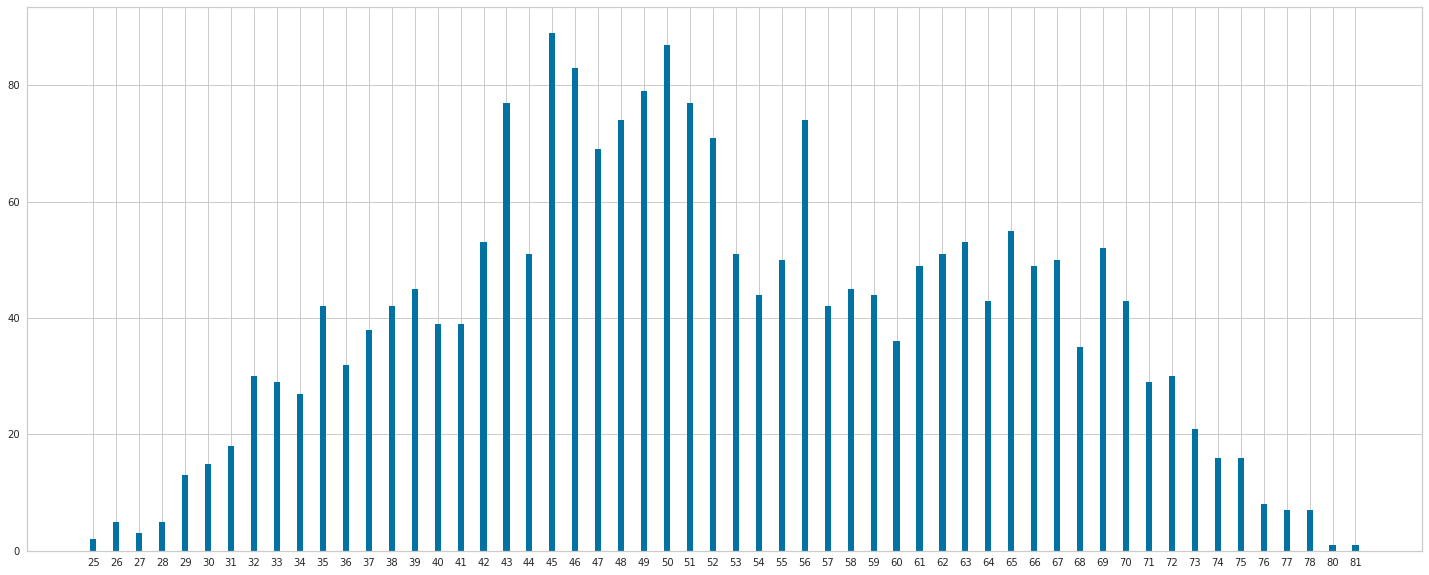

In [ ]:
# plot to see the distribution
plt.figure(figsize=(25, 10))
plt.bar(x=range(0, len(age_list) *3 ,3), height = age_l)
plt.xticks(labels= age_list, ticks=range(0,len(age_l)*3,3),rotation=360)
plt.show()

## 4. Marital Status

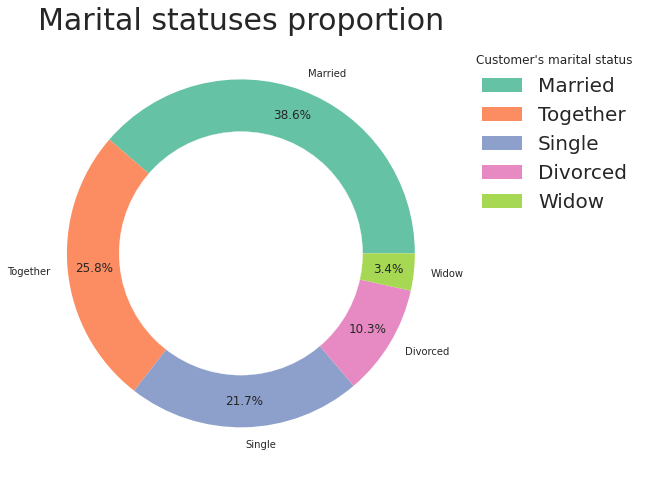

In [ ]:
sizes = dict(df['Marital_Status'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Marital statuses proportion", fontsize=30)
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)
plt.legend(title="Customer's marital status", labels=sizes.keys(), bbox_to_anchor=(1, 1), fontsize=20)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## 5. Number of purchase

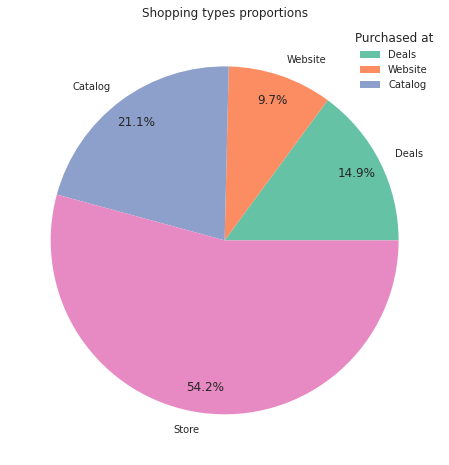

In [ ]:
num = df.filter(regex ='Num[^Deals].+Purchases').sum(axis=0)

sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Deals', 'Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Deals', 'Website', 'Catalog'], bbox_to_anchor=(1, 1))

plt.show()

## 6. Accepted campaign

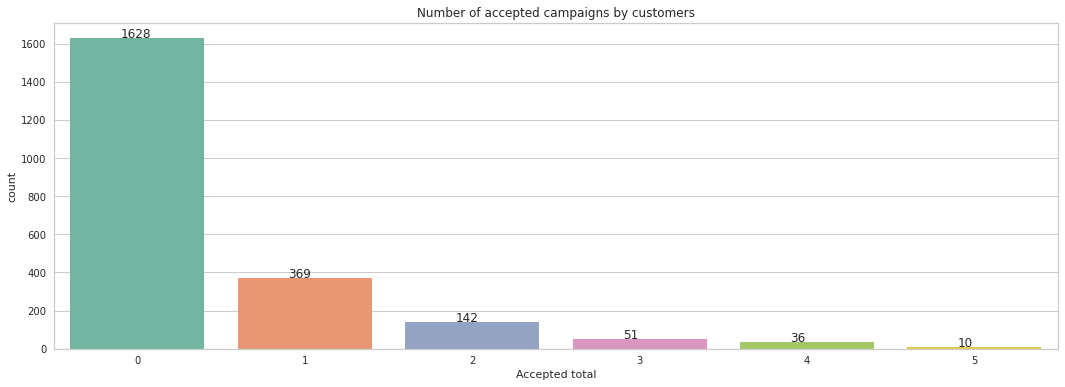

In [ ]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(df['AcceptedTotal'], palette=PALETTE)

plt.title('Number of accepted campaigns by customers')
plt.xlabel('Accepted total')

# annotating the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.30, p.get_height()+3))

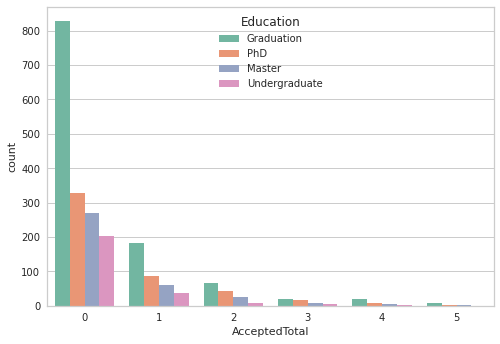

In [ ]:
ax = sns.countplot('AcceptedTotal', palette=PALETTE, hue='Education', data=df)

According the first accepted campaign's graph, we know that most of the customers do not accept the campaign. Therfore, it is not an effective marketing strategy. The second graph further explore the campaign based on Education variable. Most of our customers that reject the campaign has bachelor degree and Master's.

## 7. Income

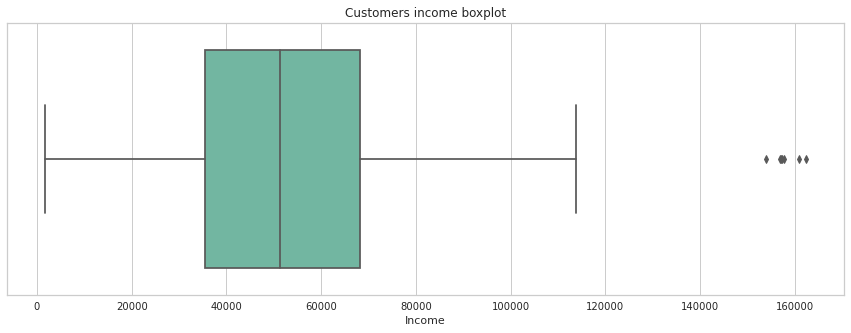

In [ ]:
plt.figure(figsize=(15,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(df['Income'], palette=PALETTE)
plt.show()

In [ ]:
#average income of the customers
df['Income'].mean()

51952.61404293381

## 8. Number of Children in household

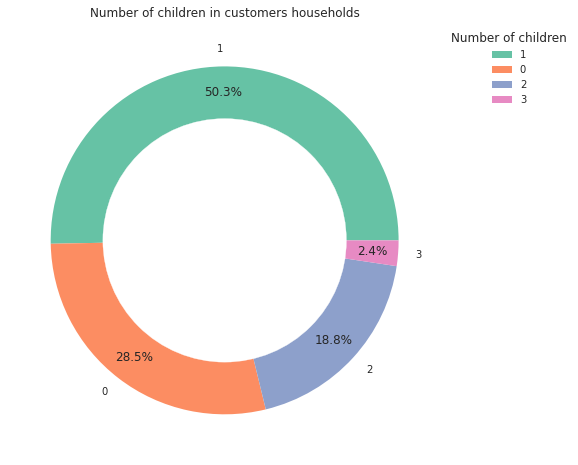

In [ ]:
sizes = dict(df['NumChildren'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)
plt.legend(title="Number of children", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Accepted Campaigns by having childeren

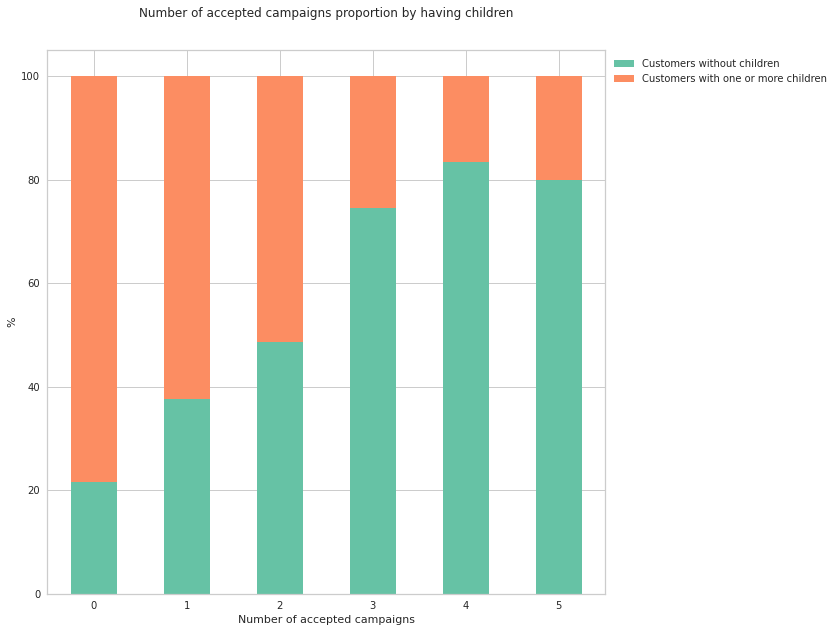

In [ ]:
plt.figure(figsize=(10, 10))

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(df['HasChildren'].unique()):
    tmp_data += accepted_data
    accepted_data = (df.query(f'HasChildren == {value}')['AcceptedTotal'].value_counts()
                                                                           .divide(df['AcceptedTotal'].value_counts())
                                                                           .multiply(100))
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by having children', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(['Customers without children', 'Customers with one or more children'], bbox_to_anchor=(1,1))

plt.show()

<AxesSubplot:xlabel='HasChildren', ylabel='NumDealsPurchases'>

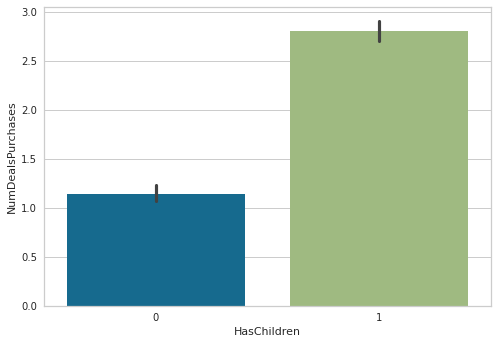

In [ ]:
sns.barplot(x='HasChildren', y='NumDealsPurchases', data=df)

## 9. Customer Spending

### Amount spent on different types of products

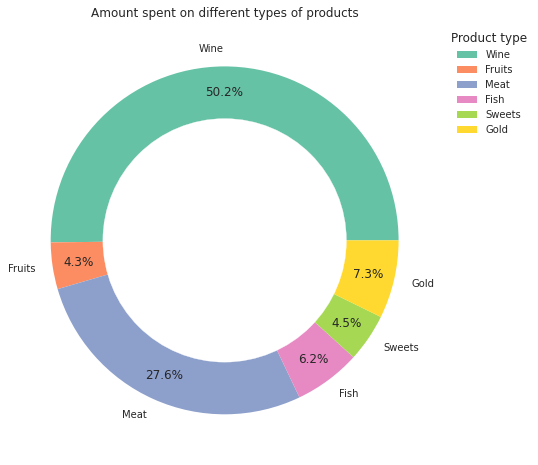

In [ ]:
mnt = df.filter(like='Mnt').apply(lambda x: sum(x), axis=0)

sizes = dict(mnt)

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=['Wine', 'Fruits', 'Meat',
                                'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat',
                                         'Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Average spending by Education level

In [ ]:
product_spent=df.groupby("Education").mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
height = np.array([0, 1, 2, 3])
label=df.groupby('Education').count()['ID'].index

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


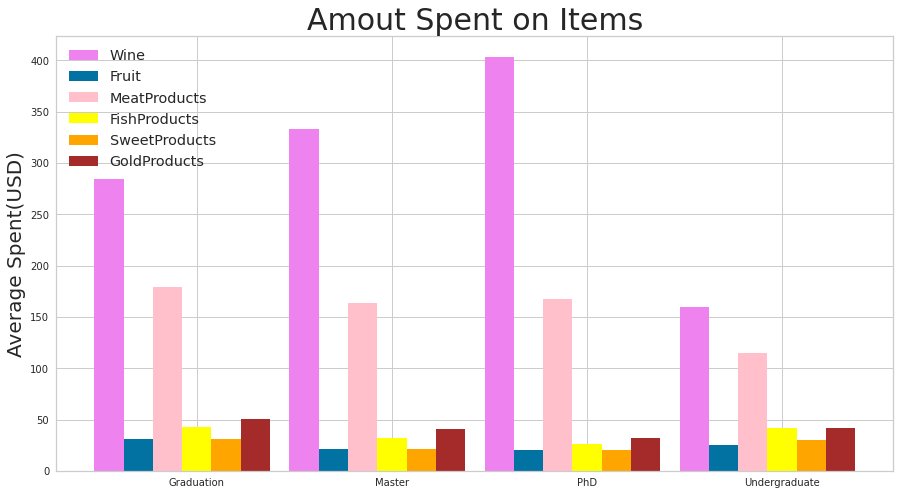

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(height-0.45,product_spent.MntWines,width=0.15, label="Wine",color='violet')
plt.bar(height-0.3,product_spent.MntFruits,width=0.15,label="Fruit")
plt.bar(height-0.15,product_spent.MntMeatProducts,width=0.15,label="MeatProducts",color='pink')
plt.bar(height,product_spent.MntFishProducts,width=0.15,label="FishProducts",color='yellow')
plt.bar(height+0.15,product_spent.MntSweetProducts,width=0.15,label="SweetProducts",color='orange')
plt.bar(height+0.3,product_spent.MntGoldProds,width=0.15,label="GoldProducts",color='brown')

plt.xticks(height,label)
plt.ylabel("Average Spent(USD)", fontsize=20)
plt.title('Amout Spent on Items', fontsize=30)
plt.legend(loc='upper left',shadow=True,fontsize='large');

## 10. Box plots for numeric columns

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns = numeric_columns[3:18]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


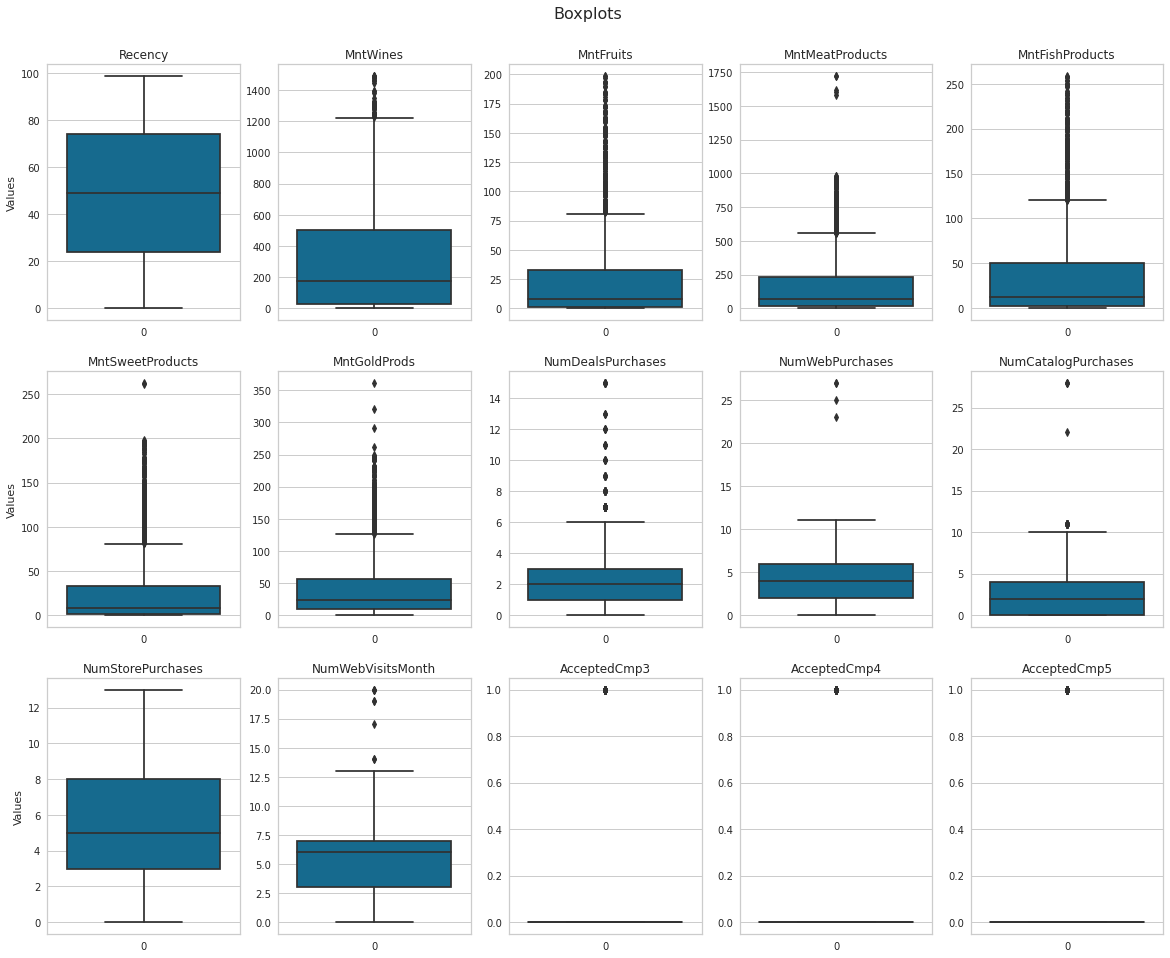

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=5, suptitle='Boxplots')

## 12. Total Expenditure & Number of purchases

In [ ]:
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

### Mean Expenditure by education

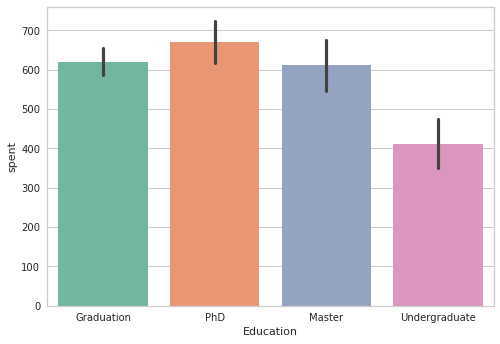

In [ ]:
sns.barplot(x='Education', y='spent', data=df, palette=PALETTE);

### Mean Number of purchases by education

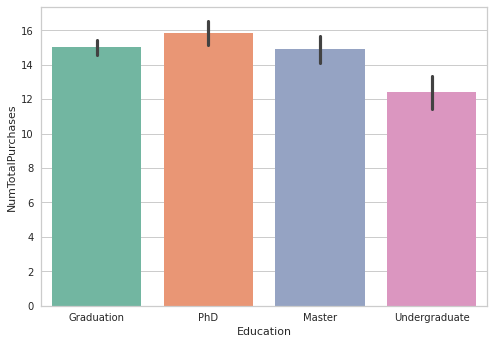

In [ ]:
sns.barplot(x='Education', y='NumTotalPurchases', data=df, palette=PALETTE);

### Expenditure by the number of children

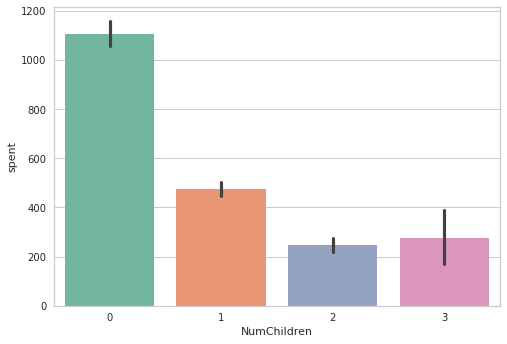

In [ ]:
sns.barplot(x='NumChildren', y='spent', data=df, palette=PALETTE);

### Number of purchases by the number of children

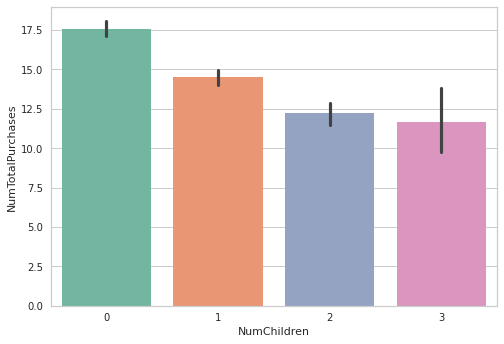

In [ ]:
sns.barplot(x='NumChildren', y='NumTotalPurchases', data=df, palette=PALETTE);

### Total Expenditure by Income

In [ ]:
label_range=range(0,120000,10000)
label_list=list(label_range)[1:]

In [ ]:
label_name=[str(i) for i in label_list]

In [ ]:
df2=df.copy()

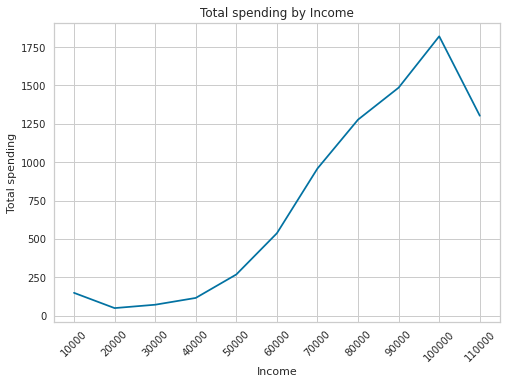

In [ ]:
df2['Income_type']=pd.cut(df2['Income'],bins=label_range,labels=label_name)
g2_data=df2.groupby('Income_type')['spent'].agg('mean')
plt.plot(g2_data)
plt.title("Total spending by Income")
plt.xlabel("Income")
plt.ylabel("Total spending")
plt.xticks(rotation=45)
plt.show();

### Number of purchases by income

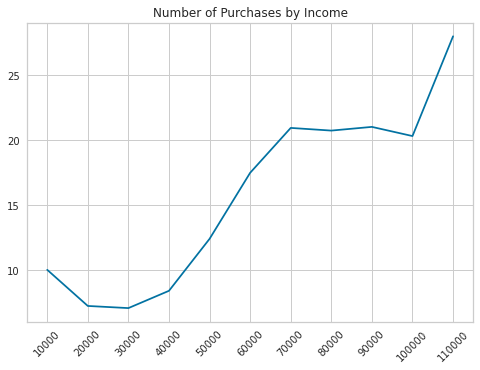

In [ ]:
df2['Income_type']=pd.cut(df2['Income'],bins=label_range,labels=label_name)
g2_data=df2.groupby('Income_type')['NumTotalPurchases'].agg('mean')
plt.plot(g2_data)
plt.title("Number of Purchases by Income")
plt.xticks(rotation=45)
plt.show();

# Clustering

## label encoding

In [ ]:
random.seed(820)

In [ ]:
df_uml = df.copy()
df_uml

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedTotal,NumChildren,HasChildren,NumTotalPurchases,spent
0,5524,64,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,1,1,0,0,25,1617
1,2174,67,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,2,1,6,27
2,4141,56,Graduation,Together,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,0,21,776
3,6182,37,Graduation,Together,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,1,1,8,53
4,5324,40,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,1,1,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,Married,61223.0,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,1,1,18,1341
2236,4001,75,PhD,Together,64014.0,10-06-2014,56,406,0,30,...,0,1,0,0,0,1,3,1,22,444
2237,7270,40,Graduation,Divorced,56981.0,25-01-2014,91,908,48,217,...,0,0,0,0,0,1,0,0,19,1241
2238,8235,65,Master,Together,69245.0,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,1,1,23,843


In [ ]:
df_uml["Education"] = df_uml["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation': 'Postgraduate', 'PhD': 'Postgraduate', 'Master':'Postgraduate'})

In [ ]:
df_uml.drop('HasChildren',1)

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedTotal,NumChildren,NumTotalPurchases,spent
0,5524,64,Postgraduate,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,1,1,0,25,1617
1,2174,67,Postgraduate,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,0,2,6,27
2,4141,56,Postgraduate,Together,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,0,21,776
3,6182,37,Postgraduate,Together,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,0,1,8,53
4,5324,40,Postgraduate,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,0,1,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Postgraduate,Married,61223.0,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,0,1,18,1341
2236,4001,75,Postgraduate,Together,64014.0,10-06-2014,56,406,0,30,...,0,0,1,0,0,0,1,3,22,444
2237,7270,40,Postgraduate,Divorced,56981.0,25-01-2014,91,908,48,217,...,1,0,0,0,0,0,1,0,19,1241
2238,8235,65,Postgraduate,Together,69245.0,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,0,1,23,843


In [ ]:
s = (df_uml.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer']


In [ ]:
LE=LabelEncoder()
for i in object_cols:
    df_uml[i]=df_uml[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
df_uml.head()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedTotal,NumChildren,HasChildren,NumTotalPurchases,spent
0,5524,64,0,2,58138.0,80,58,635,88,546,...,0,0,0,0,1,1,0,0,25,1617
1,2174,67,0,2,46344.0,157,38,11,1,6,...,0,0,0,0,0,0,2,1,6,27
2,4141,56,0,3,71613.0,444,26,426,49,127,...,0,0,0,0,0,0,0,0,21,776
3,6182,37,0,3,26646.0,199,26,11,4,20,...,0,0,0,0,0,0,1,1,8,53
4,5324,40,0,1,58293.0,390,94,173,43,118,...,0,0,0,0,0,0,1,1,19,422


## Standardization

In [ ]:
#drop the columns that are not significant to the analysis
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'ID']
df_uml = df_uml.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_uml)
scaled_dc = pd.DataFrame(scaler.transform(df_uml),columns= df_uml.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
scaled_dc.head()

,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedTotal,NumChildren,HasChildren,NumTotalPurchases,spent
0,1.016868,-0.35878,0.250425,0.288947,-1.303716,0.306856,0.983228,1.554170,1.679746,2.461068,...,0.348738,1.407639,2.509801,-0.552429,0.692865,0.620456,-1.264308,-1.584362,1.319340,1.680176
1,1.273264,-0.35878,0.250425,-0.262003,-0.898592,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.501987,1.395139,0.631169,-1.155857,-0.962202
2,0.333146,-0.35878,1.193103,0.918423,0.611419,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.501987,-1.264308,-1.584362,0.798246,0.282541
3,-1.290693,-0.35878,1.193103,-1.182183,-0.677614,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.501987,0.065416,0.631169,-0.895310,-0.918994
4,-1.034298,-0.35878,-0.692252,0.296187,0.327306,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.501987,0.065416,0.631169,0.537699,-0.305762


## PCA

In [ ]:
pca = PCA()
pca.fit(scaled_dc)

PCA()

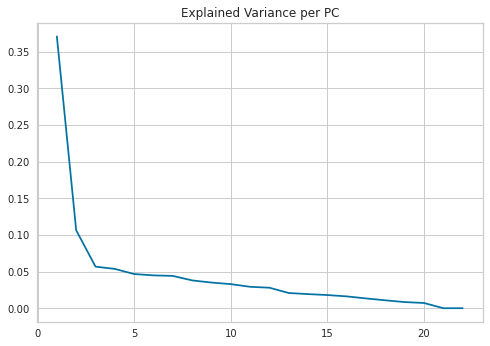

In [ ]:
# variance explation ratio -- pc explained variance
varexp = pca.explained_variance_ratio_
np.sum(varexp)


# plot the variance explained the PC
# not useful for anaylsis
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.show()

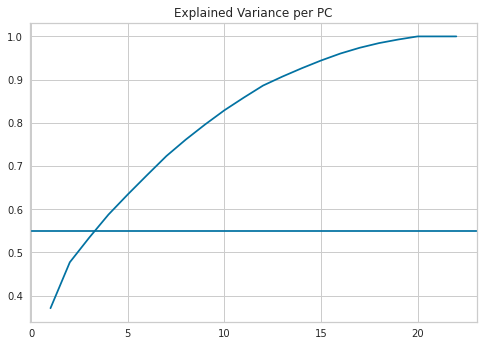

In [ ]:
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(0.55)
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_dc)
PCA_ds = pd.DataFrame(pca.transform(scaled_dc), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,4.011897e-17,2.857494,-5.022235,-2.642796,-0.767245,2.498572,8.116004
col2,2236.0,1.484601e-17,1.529725,-4.828975,-1.120534,-0.218940,1.004230,5.684411
col3,2236.0,1.688175e-17,1.117649,-3.396905,-0.725545,-0.149003,0.556762,5.199019


## KMeans

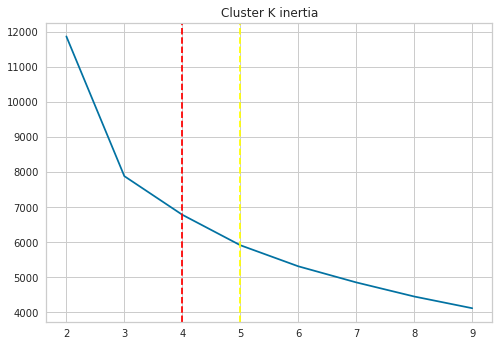

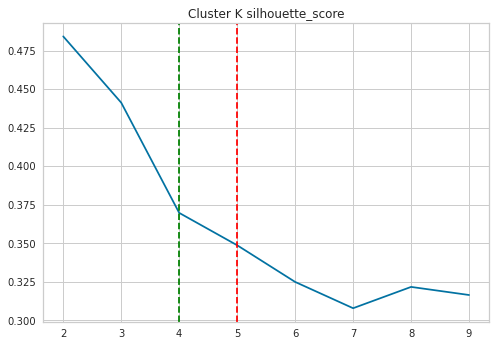

In [ ]:
# add the horizontal lines to the kmeans inertia and average silhouette score to show the clustering.
krange = range(2, 10)
kc = []
ks = []
#ks = ksilhouette
#kc = kcontainer
for i in krange:
    km=KMeans(n_clusters = i)
    km.fit(PCA_ds)
    lab=km.predict(PCA_ds)
    kc.append(km.inertia_)
    ks.append(metrics.silhouette_score(PCA_ds, lab))

plt.title('Cluster K inertia')
sns.lineplot(krange, kc)
plt.axvline(x=4, color='red', linestyle='dashed')
plt.axvline(x=5, color='yellow', linestyle='dashed')
plt.show()

plt.title('Cluster K silhouette_score')
sns.lineplot(krange, ks)
plt.axvline(x=4, color='green', linestyle='dashed')
plt.axvline(x=5, color='red', linestyle='dashed')
plt.show()

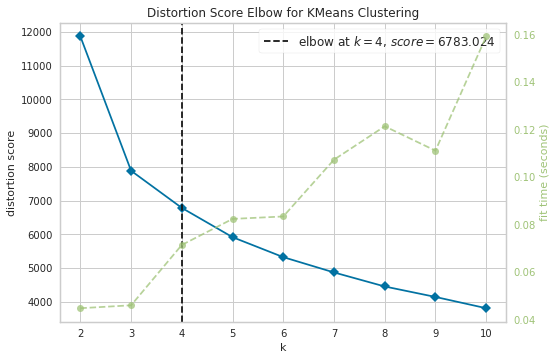

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# Fit K-Means
kmeans1 = KMeans(n_clusters=4,random_state= 20)
# Use fit_predict to cluster the dataset
predictions = kmeans1.fit_predict(PCA_ds)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(PCA_ds, kmeans1.labels_, metric='euclidean')
print('Silhouette Score: %.4f' % score_kemans_s)

Silhouette Score: 0.3698


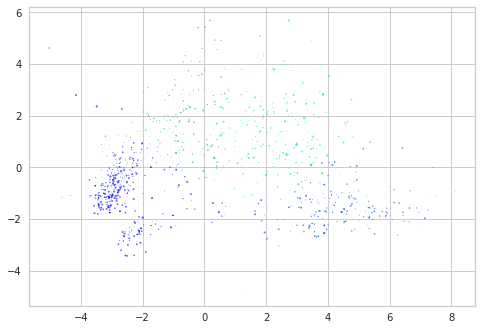

In [ ]:
plt.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
           c = KMeans(n_clusters = 4).fit_predict(PCA_ds), cmap =plt.cm.winter, alpha = 0.6)
plt.show()

## Hierarchal Clustering - Agglomerative

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

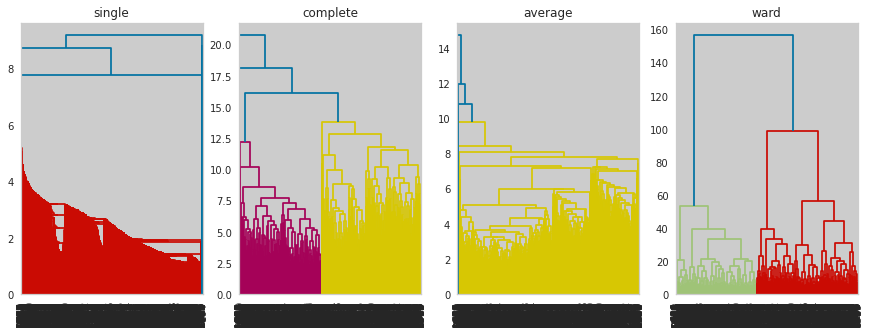

In [ ]:
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))


# loop and build our plot
for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(scaled_dc.values, method=m),
             labels = scaled_dc.index,
             leaf_rotation=90,
             leaf_font_size=10)

plt.show()

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
#PCA_ds["Clusters"] = yhat_AC


In [ ]:
# Calculate cluster validation score
silhouette_AC = silhouette_score(PCA_ds, yhat_AC, metric='euclidean')
print('Silhouette Score: %.4f' % silhouette_AC)

Silhouette Score: 0.4293


In [ ]:
from sklearn.mixture import GaussianMixture

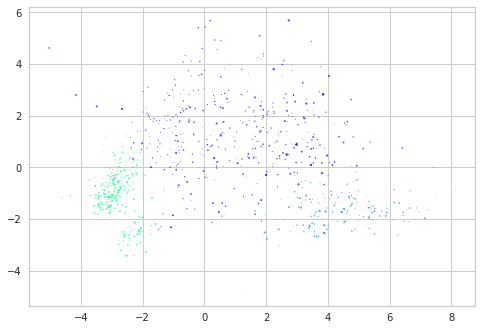

In [ ]:
plt.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
           c = GaussianMixture(n_components = 3).fit_predict(PCA_ds), cmap =plt.cm.winter, alpha = 0.6)
plt.show()

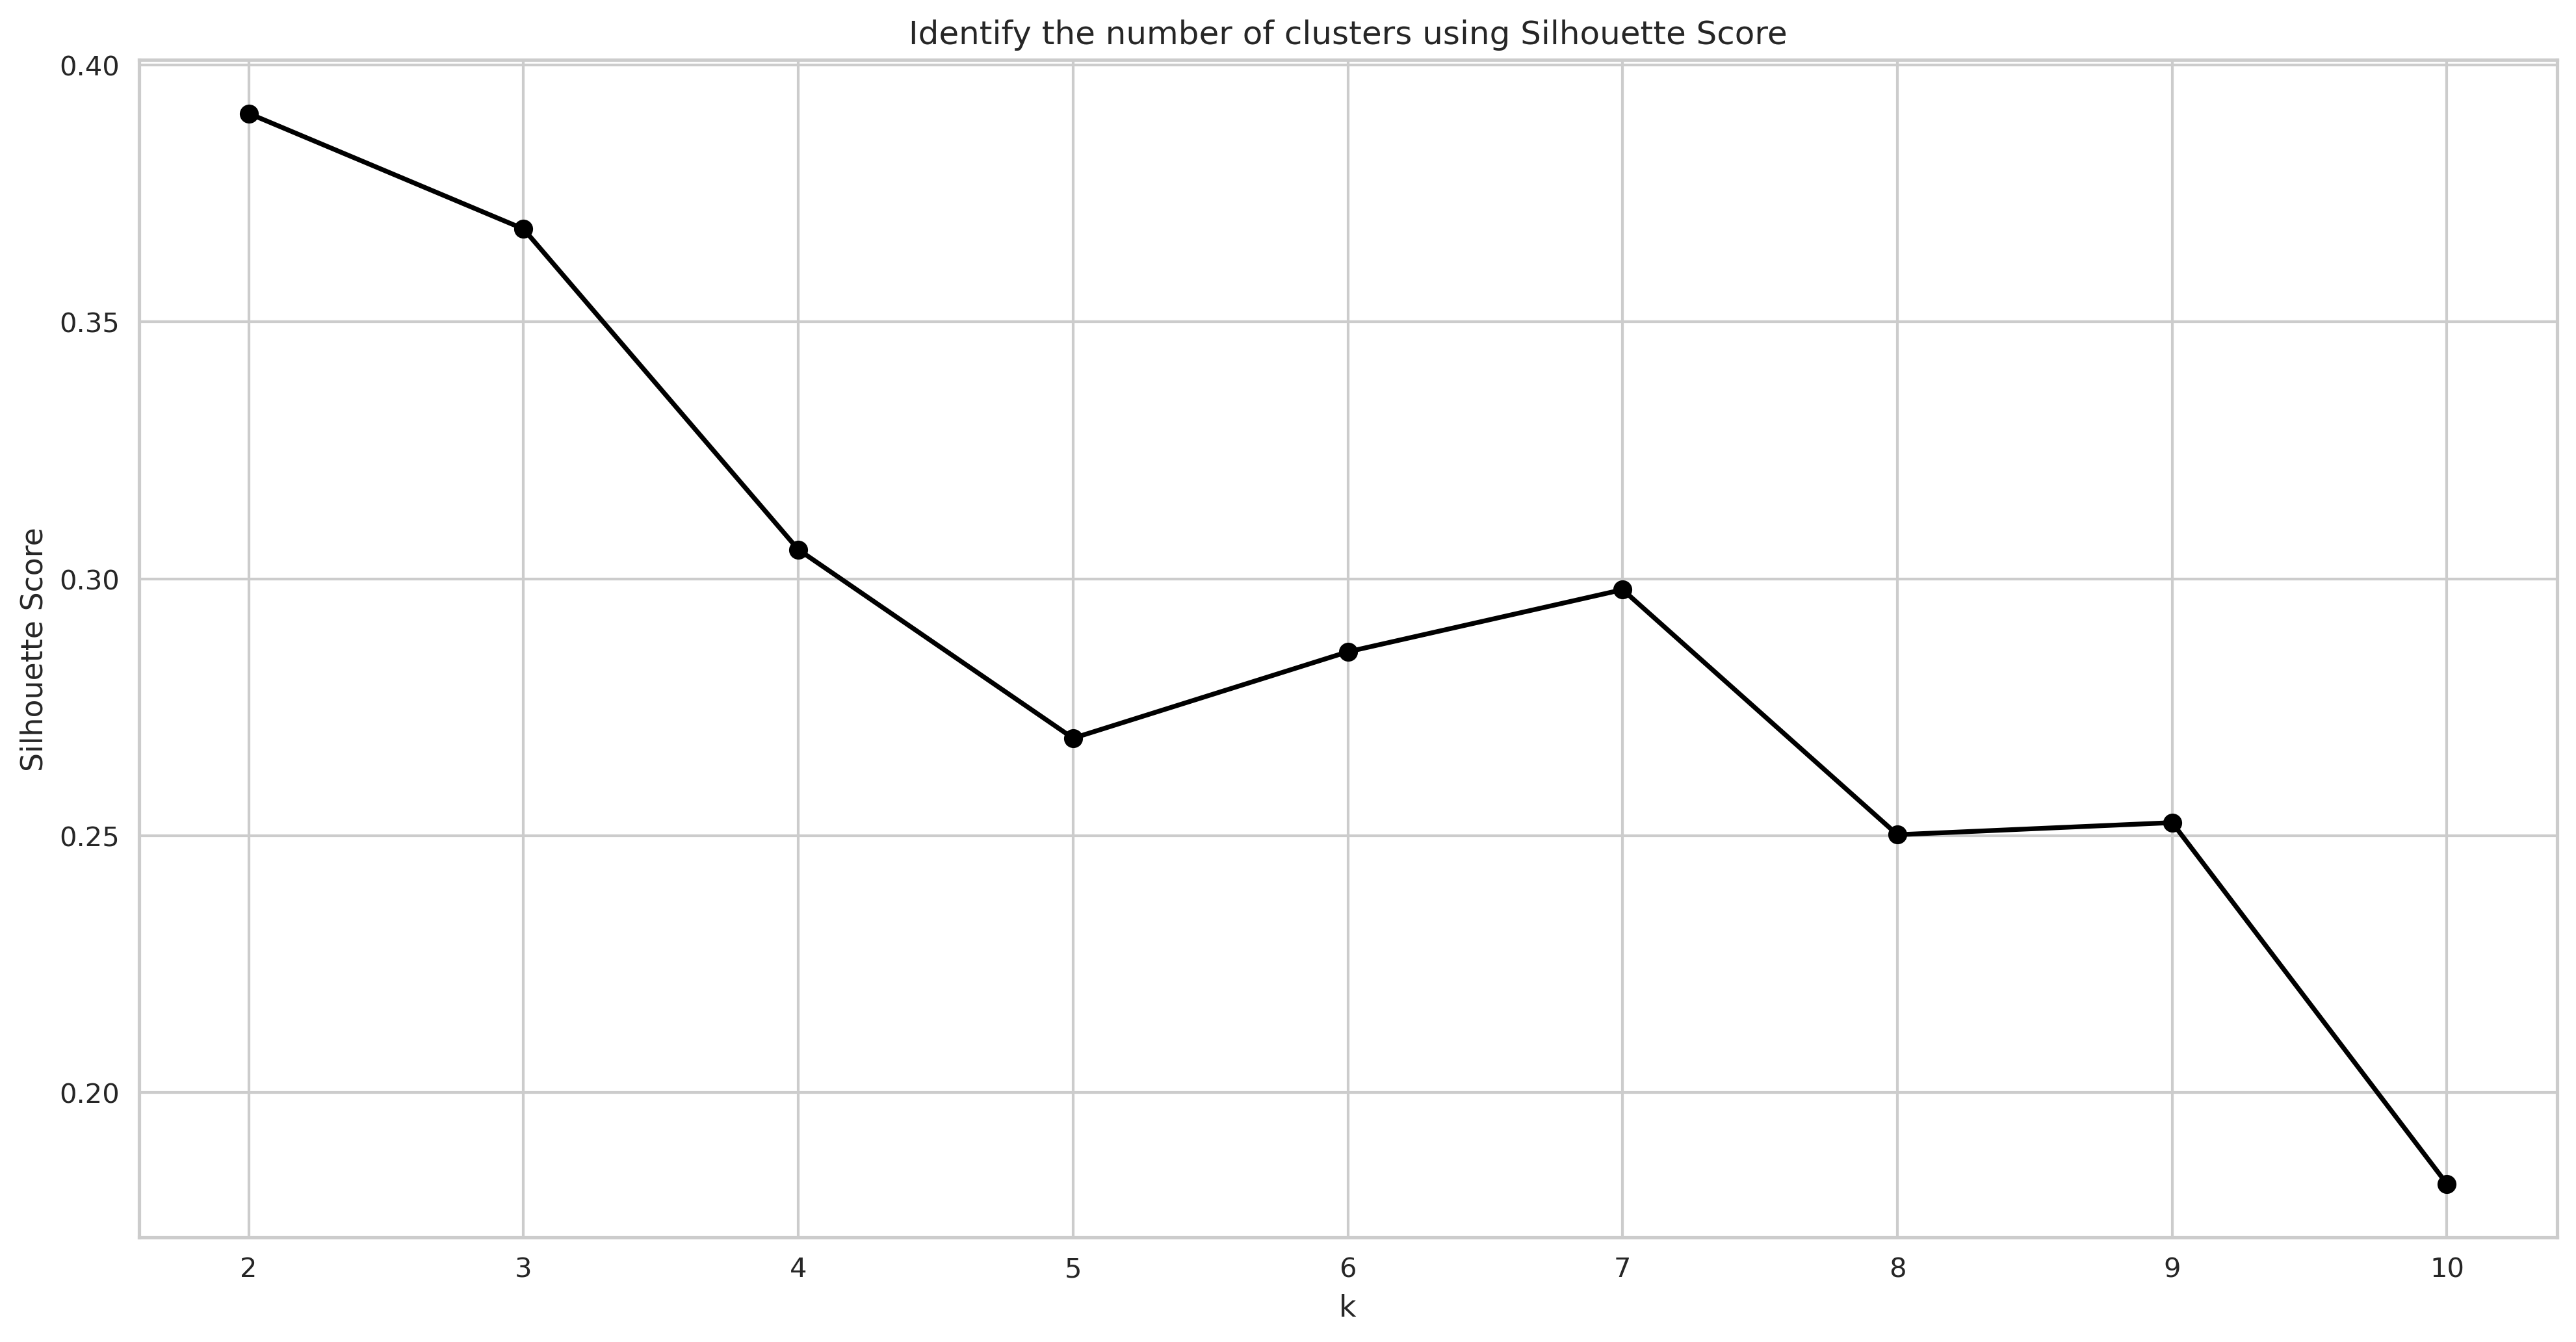

In [ ]:
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans', random_state = 820)
    # Fit the model
    labels = model.fit_predict(PCA_ds)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(PCA_ds, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

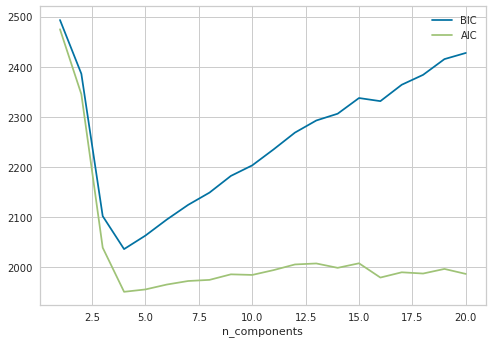

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
from numpy import unique
gmm = GaussianMixture(n_components=3, covariance_type='spherical', max_iter=2000, random_state=30).fit(PCA_ds)
labels = gmm.predict(PCA_ds)
#clusters = unique(yhat_gmm)

In [ ]:
# Calculate cluster validation score
silhouette = silhouette_score(PCA_ds, labels, metric='euclidean')
print('Silhouette Score: %.4f' % silhouette)

Silhouette Score: 0.4403


In [ ]:
## Gaussian Clustering was most accurate model
#Add clusters back into dataframe

df_uml["Clusters"]= labels

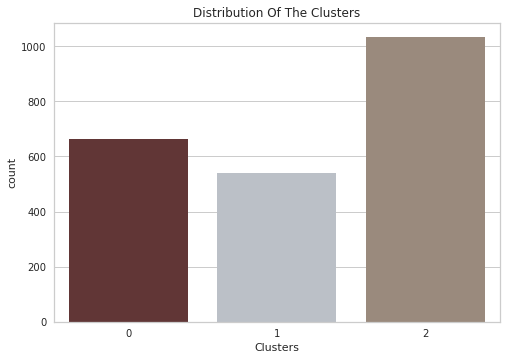

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sns.countplot(x=df_uml["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

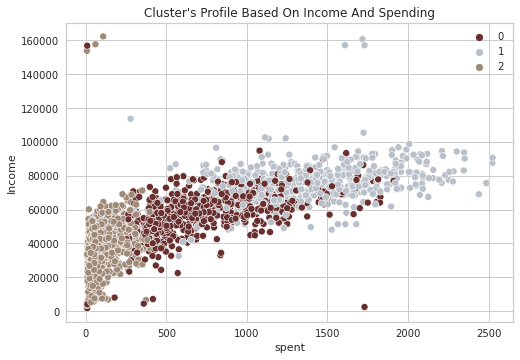

In [ ]:
pl = sns.scatterplot(data = df_uml,x=df_uml["spent"], y=df_uml["Income"],hue=df_uml["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

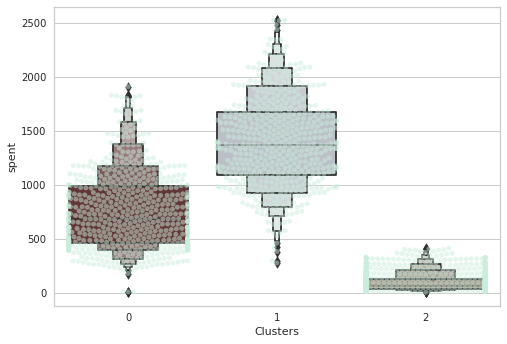

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df_uml["Clusters"], y=df_uml["spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_uml["Clusters"], y=df_uml["spent"], palette=pal)
plt.show()

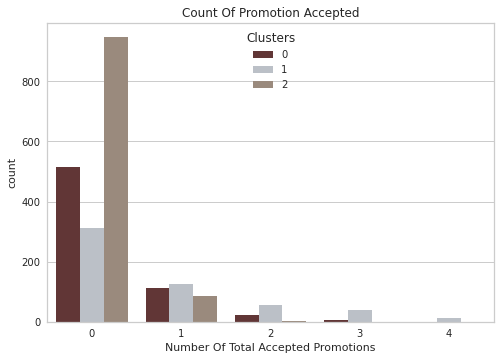

In [ ]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df_uml["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
df_uml['HasPartner'] = df["Marital_Status"].replace({'Single': 'No',
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})

In [ ]:
df_uml["Age"] = pd.cut(x=df_uml["Age"], bins=[0,18,35,55,61,95])

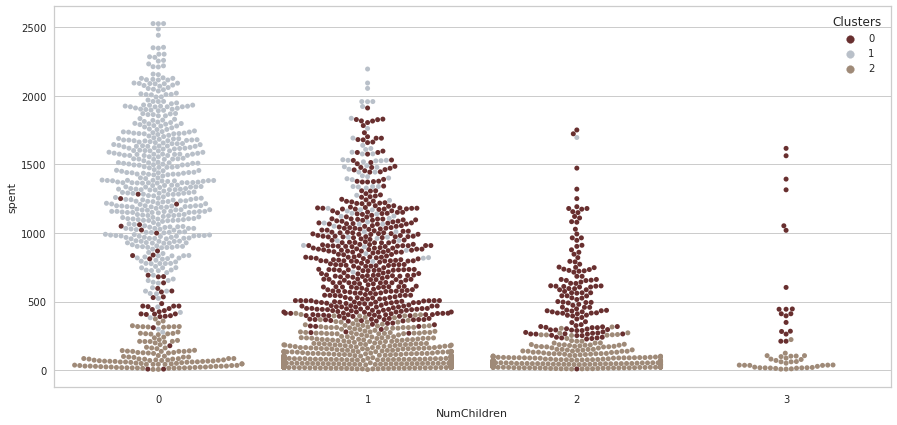

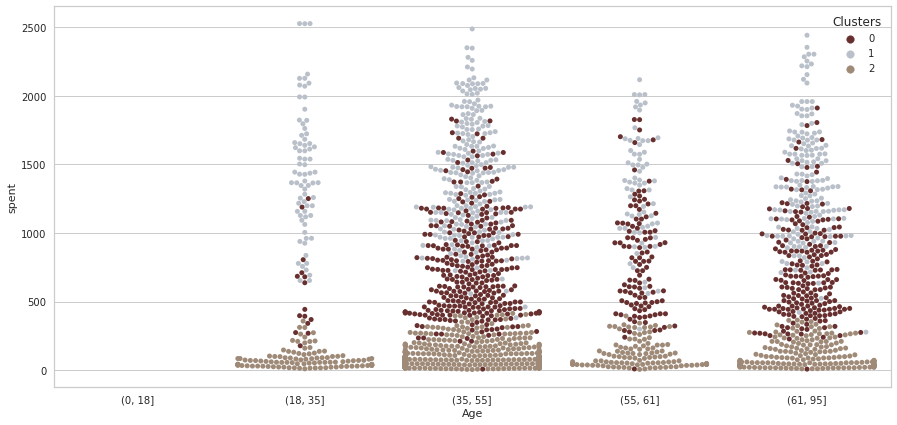

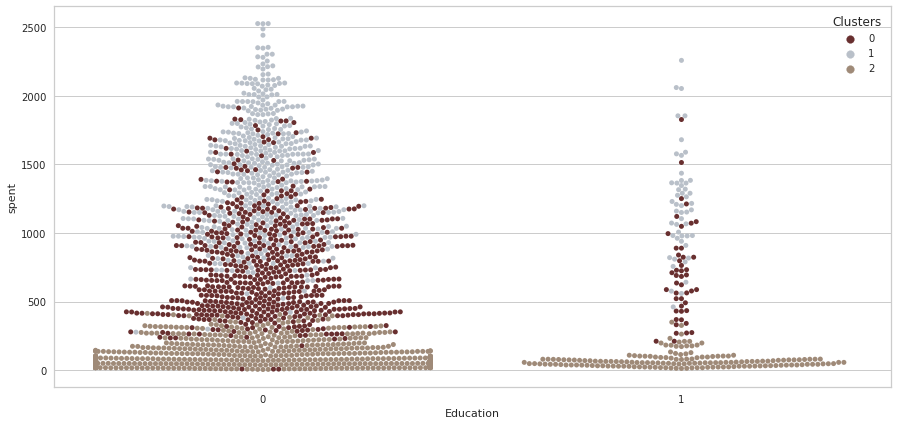

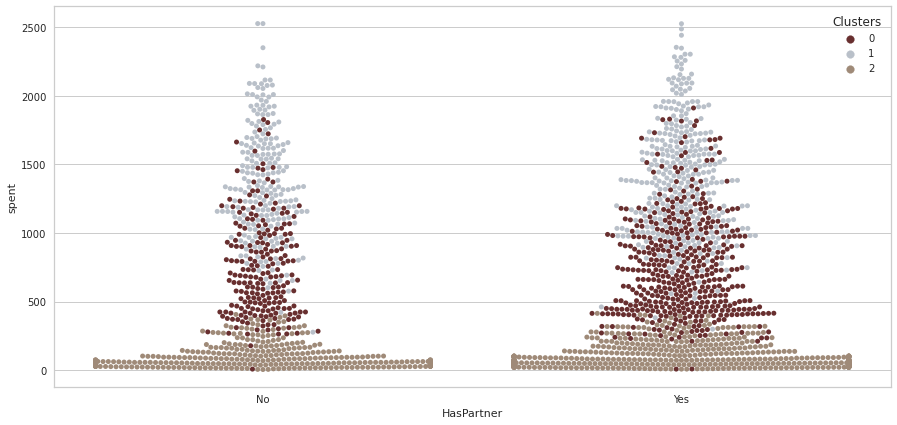

In [ ]:
prf = ["NumChildren", "Age", "Education", "HasPartner"]
for i in prf:
    plt.figure(figsize=(15,7))
    sns.swarmplot(x=i, y="spent", hue="Clusters", palette=pal ,data=df_uml)
    plt.show()

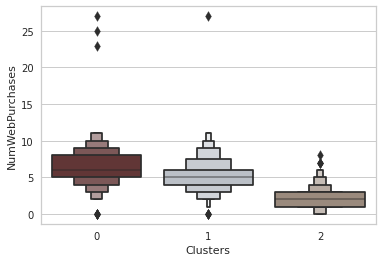

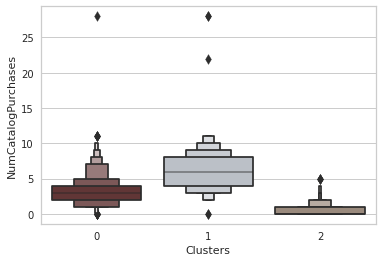

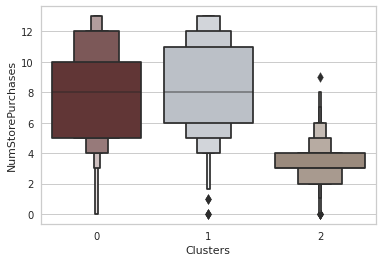

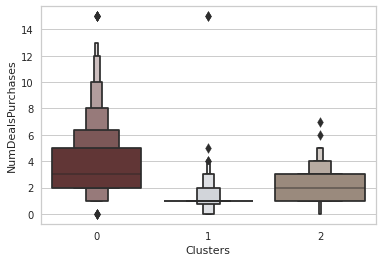

In [ ]:
place = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 'NumDealsPurchases']
for i in place:
    sns.boxenplot(x="Clusters", y=i, palette=pal,data=df_uml);
    plt.show()

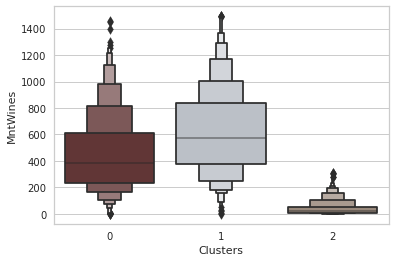

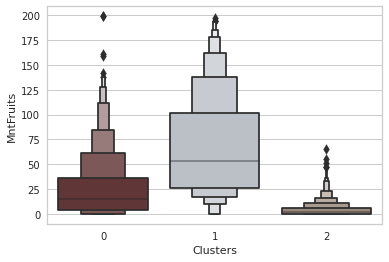

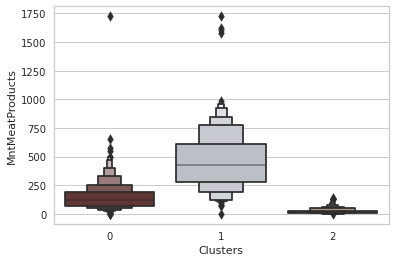

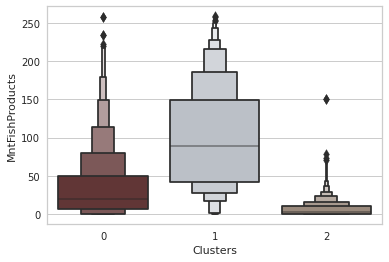

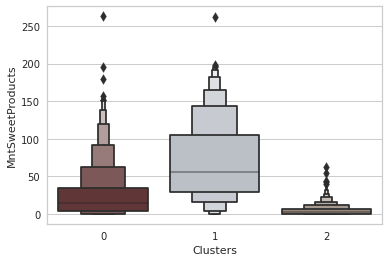

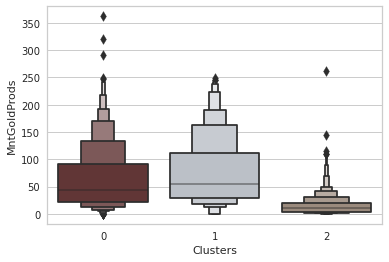

In [ ]:
products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in products:
    sns.boxenplot(x="Clusters", y=i, palette=pal,data=df_uml);
    plt.show()

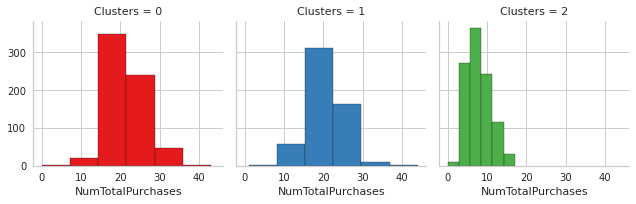

In [ ]:
diag = sns.FacetGrid(df_uml, col = "Clusters", hue = "Clusters", palette = "Set1")
diag.map(plt.hist, 'NumTotalPurchases', bins=6, ec="k")

# Prediction

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import  Counter

In [ ]:
df_ml=df.copy()

In [ ]:
df_ml.drop('AcceptedTotal', axis=1, inplace=True)

In [ ]:
df_ml.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)
df_ml['Education'] = df_ml['Education'].replace(['Basic'], 0)
df_ml['Education'] = df_ml['Education'].replace(['Bachelor'], 1)
df_ml['Education'] = df_ml['Education'].replace(['Master'], 2)
df_ml['Education'] = df_ml['Education'].replace(['PhD'], 3)
df_ml = pd.get_dummies(df_ml)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2236 non-null   int64  
 1   Education                2236 non-null   int64  
 2   Income                   2236 non-null   float64
 3   Recency                  2236 non-null   int64  
 4   MntWines                 2236 non-null   int64  
 5   MntFruits                2236 non-null   int64  
 6   MntMeatProducts          2236 non-null   int64  
 7   MntFishProducts          2236 non-null   int64  
 8   MntSweetProducts         2236 non-null   int64  
 9   MntGoldProds             2236 non-null   int64  
 10  NumDealsPurchases        2236 non-null   int64  
 11  NumWebPurchases          2236 non-null   int64  
 12  NumCatalogPurchases      2236 non-null   int64  
 13  NumStorePurchases        2236 non-null   int64  
 14  NumWebVisitsMonth       

# **Feature Selection**

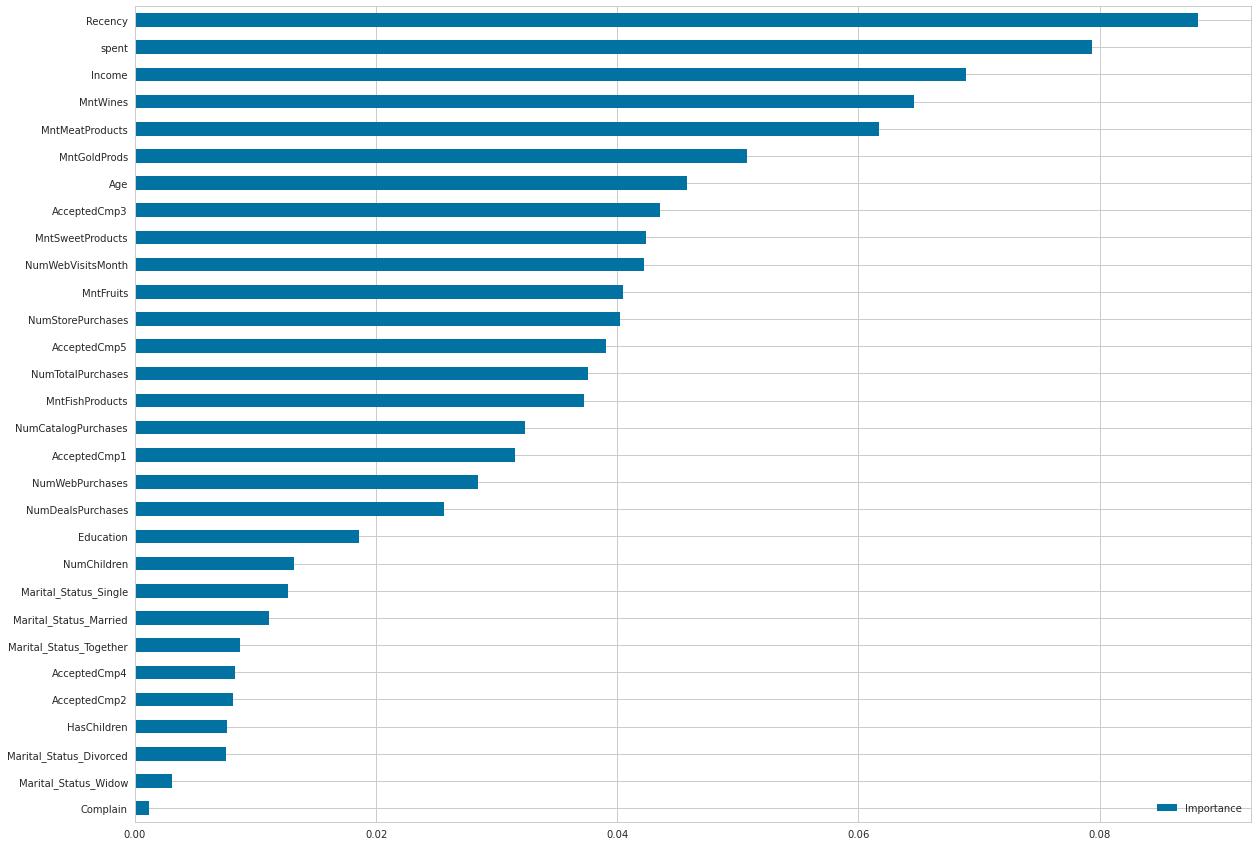

In [ ]:
data = df_ml
clf = RandomForestClassifier()
clf.fit(data.drop('Response', axis=1), data['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [ ]:
feature_nums = 18
ascend_import = importance.sort_values(by='Importance', ascending=False)
all_info = ascend_import['Importance'].iloc[:feature_nums].sum()
all_choose_features = list(ascend_import.iloc[:feature_nums].index)

print('Names: ', all_choose_features)
print('Importance Raio: ', all_info)

Names:  ['Recency', 'spent', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'AcceptedCmp3', 'MntSweetProducts', 'NumWebVisitsMonth', 'MntFruits', 'NumStorePurchases', 'AcceptedCmp5', 'NumTotalPurchases', 'MntFishProducts', 'NumCatalogPurchases', 'AcceptedCmp1', 'NumWebPurchases']
Importance Raio:  0.8742517737087946


# **PCA Transformation**

PCA data shape:  (2236, 19)


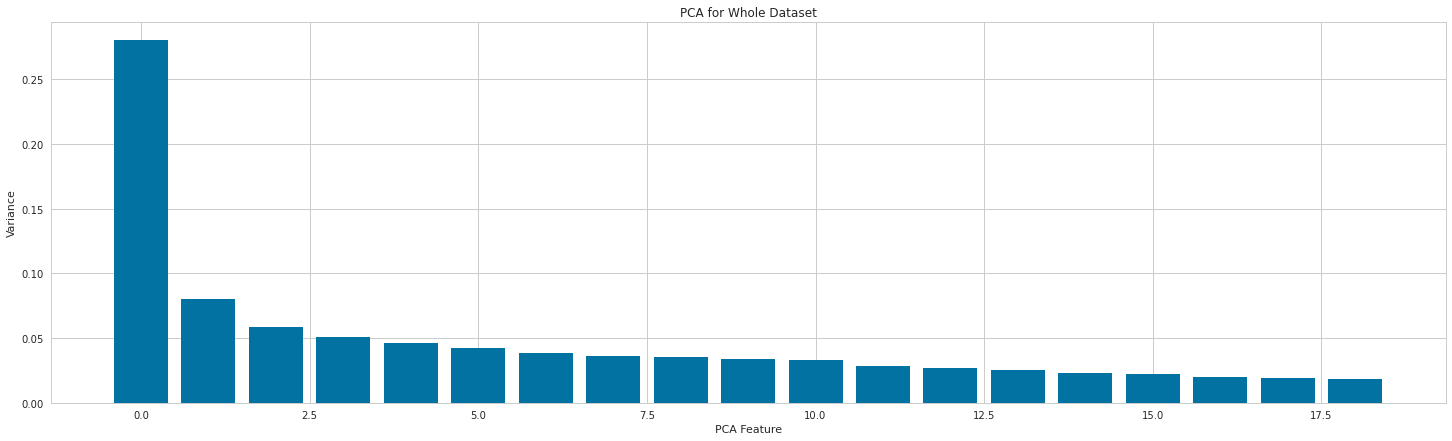

In [ ]:
from sklearn.decomposition import PCA
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(data.drop('Response', axis=1))
X = std_scale.transform(data.drop('Response', axis=1))

pca1 = PCA(0.90, whiten=True) # Keep 90% information
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7))
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Whole Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

# Get pca transformed data
pca_data = pca1.transform(X)
pca_data = np.array(pca_data)
print('PCA data shape: ', pca_data.shape)

# **Data Training**

In [ ]:
# Choose dataset
dataset_num = 1

# 0: Raw Data; 1: Feature Selection Data; 2: PCA Data
all_datasets = [data.drop('Response', axis=1).values, data[all_choose_features].values, pca_data]

# Choose data
final_data = all_datasets[dataset_num]

In [ ]:
# Split the dataset
from imblearn.over_sampling import SMOTE
from collections import  Counter

x_train = final_data[:2000]
y_train = data['Response'].values[:2000]
x_test = final_data[2000:]
y_test = data['Response'].values[2000:]

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# MCC scorer function
mcc_scorer = make_scorer(matthews_corrcoef)

Train:  2000
Test:  236
N/P Sample:  Counter({0: 1698, 1: 302})
Train:  3396
Test:  236
N/P Sample:  Counter({1: 1698, 0: 1698})


In [ ]:
LR = LogisticRegression()

# K-Fold Validation
kfold = 8

# ACC Score
LR_cv_results_acc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s k-fold ACC: %f (%f)" % ('LR', LR_cv_results_acc.mean(), LR_cv_results_acc.std())
print(msg)
# MCC Score
LR_cv_results_mcc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring=mcc_scorer)
msg = "%s k-fold MCC: %f (%f)" % ('LR', LR_cv_results_mcc.mean(), LR_cv_results_mcc.std())
print(msg)

LR k-fold ACC: 0.678455 (0.013125)
LR k-fold MCC: 0.359577 (0.025757)


In [ ]:
# Validation for Boosting Tree
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=160, random_state=1)
# ACC Score
BT_cv_results_acc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "BT k-fold ACC: %f (%f)" % (BT_cv_results_acc.mean(), BT_cv_results_acc.std())
print(msg)

# MCC Score
BT_cv_results_mcc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring=mcc_scorer)
msg = "BT k-fold MCC: %f (%f)" % (BT_cv_results_mcc.mean(), BT_cv_results_mcc.std())
print(msg)

BT k-fold ACC: 0.905233 (0.094296)
BT k-fold MCC: 0.822807 (0.164620)


**Model Choosing**

Boosting Tree performs the best among all the models in all 3 datasets;
LR is the worst model because it is too simple for this classfication task.
Boosting Tree have some outliers in raw datasets and feature selection datasets, which indicates this algorithm might not be stable in these datasets.

In conclusion, in this classfication task, we could use Feature Selection Dataset + Boosting Tree.

In [ ]:
# Raw dataset + Boosting Tree
dataset_num = 1 # feature selection
dataset = all_datasets[dataset_num]

# Split train & test
x_train = dataset[:2000]
y_train = data['Response'].values[:2000]
x_test = dataset[2000:]
y_test = data['Response'].values[2000:]

In [ ]:
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())
BT = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200)
BT.fit(x_train, y_train)
predictions = BT.predict(x_test)
# Classification Report
BT_MCC = matthews_corrcoef(y_test, predictions)

print('Train MCC: '+ str(matthews_corrcoef(BT.predict(x_train), y_train)))
print('Test MCC: ', str(BT_MCC))
print('Test ACC: ', accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))

Train MCC: 0.9894020385748943
Test MCC:  0.39908390382848175
Test ACC:  0.8728813559322034
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       204
           1       0.54      0.41      0.46        32

    accuracy                           0.87       236
   macro avg       0.73      0.68      0.70       236
weighted avg       0.86      0.87      0.87       236



**Conclusion**

The overall test accuracy of the model is 0.87. But dive deep into the score report, the model performs quite good in recognizing negative samples(0), but not good in positive samples (precision: 0.55, recall: 0.55).

The test MCC is 0.469, which indicates that the model may not good at finding positive samples in test set. While we find the Train MCC is 0.98, this result shows there might exist overfitting problem in the model. But the fact is even I tried a lot to simplify the model and the train MCC decreases a lot, the test mcc still can not show much improvements. This result might indicate the predictors we use in this dataset might not predict 'Response' very well.